In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
foolad = pd.read_excel('C:\\Users\\ME\\Desktop\\foolad.xlsx',  sheet_name = 'total44')
foolad.drop('MITST_NUM_MITST',axis= 1, inplace=True)
foolad.drop('no',axis= 1, inplace=True)
foolad.drop('SUBSTR(M.MITST_NUM_MITST,3,5)',axis= 1, inplace=True)
foolad.head()

,ITEM_ITEM_ID,A13881,A13882,A13883,A13884,A13891,A13892,A13893,A13894,A13901,...,A13973,A13974,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994
0,630992,4,4,4,0,0,0,0,4,0,...,0,7,0,8,0,0,0,0,6,5
1,631057,9,10,13,0,3,0,0,20,0,...,4,13,0,8,8,10,0,4,2,6
2,631739,3,1,0,0,1,1,2,0,0,...,1,1,2,0,0,0,0,0,0,2
3,632541,0,0,8,0,0,0,22,9,13,...,27,36,10,31,9,18,0,0,9,27
4,633036,4,0,3,0,0,1,1,3,3,...,1,4,0,3,1,0,7,2,4,8


In [2]:
# set a column as an ID
foolad['ITEM_ITEM_ID'] = foolad['ITEM_ITEM_ID'].factorize()[0]
foolad_df = pd.DataFrame(foolad)
foolad_df

,ITEM_ITEM_ID,A13881,A13882,A13883,A13884,A13891,A13892,A13893,A13894,A13901,...,A13973,A13974,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994
0,0,4,4,4,0,0,0,0,4,0,...,0,7,0,8,0,0,0,0,6,5
1,1,9,10,13,0,3,0,0,20,0,...,4,13,0,8,8,10,0,4,2,6
2,2,3,1,0,0,1,1,2,0,0,...,1,1,2,0,0,0,0,0,0,2
3,3,0,0,8,0,0,0,22,9,13,...,27,36,10,31,9,18,0,0,9,27
4,4,4,0,3,0,0,1,1,3,3,...,1,4,0,3,1,0,7,2,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1340,0,0,0,1,0,0,1,0,0,...,0,1,1,1,2,1,1,0,1,0
1341,1341,12,0,0,0,38,25,0,0,0,...,0,0,20,0,0,0,0,5,0,10
1342,1342,0,2,0,0,0,3,0,0,0,...,0,0,0,4,0,0,0,4,0,3
1343,1343,0,2,0,0,0,2,0,0,0,...,0,0,4,0,0,0,0,4,0,0


In [3]:
# sums up the rows
foolad_df['sum of rows'] = foolad_df.iloc[:, 1:].sum(axis=1)
foolad_df

,ITEM_ITEM_ID,A13881,A13882,A13883,A13884,A13891,A13892,A13893,A13894,A13901,...,A13974,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994,sum of rows
0,0,4,4,4,0,0,0,0,4,0,...,7,0,8,0,0,0,0,6,5,120.0
1,1,9,10,13,0,3,0,0,20,0,...,13,0,8,8,10,0,4,2,6,334.0
2,2,3,1,0,0,1,1,2,0,0,...,1,2,0,0,0,0,0,0,2,65.0
3,3,0,0,8,0,0,0,22,9,13,...,36,10,31,9,18,0,0,9,27,725.0
4,4,4,0,3,0,0,1,1,3,3,...,4,0,3,1,0,7,2,4,8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1340,0,0,0,1,0,0,1,0,0,...,1,1,1,2,1,1,0,1,0,51.0
1341,1341,12,0,0,0,38,25,0,0,0,...,0,20,0,0,0,0,5,0,10,511.0
1342,1342,0,2,0,0,0,3,0,0,0,...,0,0,4,0,0,0,4,0,3,51.0
1343,1343,0,2,0,0,0,2,0,0,0,...,0,4,0,0,0,0,4,0,0,42.0


In [4]:
# calculating column wise sum
average_consume = foolad.sum(axis = 0)
df1 = pd.DataFrame(average_consume,columns= ['average_consume'] ,index = None)
df1.insert(0,'ITEM_ITEM_ID', foolad_df['ITEM_ITEM_ID'], allow_duplicates=False)
df1.index = df1.index.factorize()[0]
df1.drop(index = [0,49], inplace = True)
df1['DemandDaste'] = 'Daste'+" "+ df1['average_consume'].astype(str)
DemandDaste = df1['DemandDaste'].astype('category')
df1

,ITEM_ITEM_ID,average_consume,DemandDaste
1,NaN,19166.0,Daste 19166.0
2,NaN,21225.0,Daste 21225.0
3,NaN,27214.0,Daste 27214.0
4,NaN,17013.0,Daste 17013.0
5,NaN,21708.0,Daste 21708.0
6,NaN,20677.0,Daste 20677.0
7,NaN,28612.0,Daste 28612.0
8,NaN,23910.0,Daste 23910.0
9,NaN,27027.0,Daste 27027.0
10,NaN,28102.0,Daste 28102.0


In [5]:
df_totall = df1.append(foolad_df, ignore_index=True)
df_totall

,ITEM_ITEM_ID,average_consume,DemandDaste,A13881,A13882,A13883,A13884,A13891,A13892,A13893,...,A13974,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994,sum of rows
0,NaN,19166.0,Daste 19166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,21225.0,Daste 21225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,27214.0,Daste 27214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,17013.0,Daste 17013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,21708.0,Daste 21708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1340.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,51.0
1389,1341.0,NaN,NaN,12.0,0.0,0.0,0.0,38.0,25.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,5.0,0.0,10.0,511.0
1390,1342.0,NaN,NaN,0.0,2.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,3.0,51.0
1391,1343.0,NaN,NaN,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,42.0


In [6]:
totall_use = df1['average_consume'].sum()
totall_use

1300010.5

In [7]:
foolad_df['sum of rows'].describe()

count     1345.000000
mean       966.550558
std       3455.255568
min         17.000000
25%         94.000000
50%        203.000000
75%        550.000000
max      69065.000000
Name: sum of rows, dtype: float64

In [8]:
category = ['range1' , 'range2' , 'range3' ,  'range4','range5']
foolad_df['bins'] = pd.cut(foolad_df['sum of rows'] , bins = [0,50.5, 113.5, 231.5, 586, 69065],
                           labels=['range1' , 'range2' , 'range3' ,  'range4','range5'])

foolad_df['bins']

0       range3
1       range4
2       range2
3       range5
4       range3
         ...  
1340    range2
1341    range4
1342    range2
1343    range1
1344    range4
Name: bins, Length: 1345, dtype: category
Categories (5, object): ['range1' < 'range2' < 'range3' < 'range4' < 'range5']

In [9]:
foolad_df.groupby(['bins'])['ITEM_ITEM_ID'].count()

bins
range1    122
range2    299
range3    309
range4    300
range5    315
Name: ITEM_ITEM_ID, dtype: int64

In [10]:
foolad_df.groupby(['bins'])
foolad_df.sort_values(by=['bins'], inplace=True)
foolad_df.head(1345)

,ITEM_ITEM_ID,A13881,A13882,A13883,A13884,A13891,A13892,A13893,A13894,A13901,...,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994,sum of rows,bins
991,991,0,0,1,0,0,2,0,0,1,...,1,1,2,0,0,0,1,0,32.0,range1
1156,1156,1,0,0,0,1,2,0,0,1,...,0,2,0,0,0,2,0,0,37.0,range1
1150,1150,0,2,2,0,0,0,1,0,1,...,0,7,0,0,0,1,1,2,47.0,range1
204,204,3,1,0,2,6,2,0,1,1,...,0,2,4,0,0,0,0,2,49.0,range1
1146,1146,0,1,1,0,0,1,2,0,1,...,2,0,0,0,0,0,0,2,26.0,range1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,28,48,0,24,48,0,48,24,24,...,24,0,0,0,0,0,24,0,976.0,range5
1075,1075,0,0,4,12,11,0,56,0,60,...,83,40,17,45,25,24,80,20,1560.0,range5
1073,1073,35,30,40,60,138,32,80,20,40,...,100,0,0,3,300,0,0,430,2859.0,range5
1071,1071,22,133,40,55,34,61,82,70,33,...,96,75,34,40,30,10,80,50,3066.0,range5


In [11]:
#DemandDaste_Multiply = pd.concat(['DemandDaste']*5, ignore_index=True)
copy_bins= foolad_df['bins'].copy()

In [12]:
foolad_df.drop('bins',axis= 1, inplace=True)
from sklearn.cluster import KMeans
inertia_list=[]
for k in np.arange(1, 10):
    kmn= KMeans(n_clusters=k)
    kmn.fit(foolad_df.values)
    inertia_list.append(kmn.inertia_)
    
inertia_list

[16837051707.409658,
 5885466026.720674,
 3638999092.7767515,
 2043555899.9309096,
 1232099562.8189423,
 953294052.8041923,
 802447743.8708593,
 672705735.7230242,
 536624903.98671967]

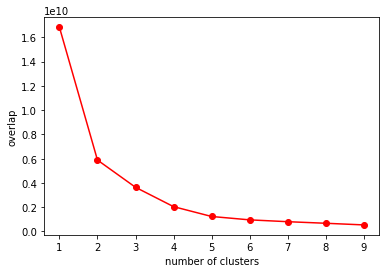

In [13]:
plt.plot(np.arange(1, 10), inertia_list, 'ro-')
plt.xlabel('number of clusters')
plt.ylabel('overlap')
plt.show()     
#طبق شکل بهتره 3 تا خوشه انتخاب کنیم ولی دوتا  میزنیم  

In [14]:
#clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#foolad_df.drop('bins',axis= 1, inplace=True)
kmn = KMeans(n_clusters=2)
kmn.fit(foolad_df.values)
labels = kmn.predict(foolad_df.values)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
#ITEM_ITEM_ID_df = pd.DataFrame(ITEM_ITEM_ID)
foolad_df['Finalcluster'] ='Daste'+" "+ copy_bins.astype(str)
foolad_df['Finalcluster']

991     Daste range1
1156    Daste range1
1150    Daste range1
204     Daste range1
1146    Daste range1
            ...     
241     Daste range5
1075    Daste range5
1073    Daste range5
1071    Daste range5
973     Daste range5
Name: Finalcluster, Length: 1345, dtype: object

In [16]:
foolad_df['labels']= labels
foolad_df['labels']

991     0
1156    0
1150    0
204     0
1146    0
       ..
241     0
1075    0
1073    0
1071    0
973     0
Name: labels, Length: 1345, dtype: int32

In [17]:
foolad_df['Finalcluster']= foolad_df.pop('Finalcluster').astype(str)+ '_' + "cluster" + foolad_df.pop('labels').astype(str)
foolad_df['Finalcluster']

991     Daste range1_cluster0
1156    Daste range1_cluster0
1150    Daste range1_cluster0
204     Daste range1_cluster0
1146    Daste range1_cluster0
                ...          
241     Daste range5_cluster0
1075    Daste range5_cluster0
1073    Daste range5_cluster0
1071    Daste range5_cluster0
973     Daste range5_cluster0
Name: Finalcluster, Length: 1345, dtype: object

In [18]:
foolad_df.head(100)

,ITEM_ITEM_ID,A13881,A13882,A13883,A13884,A13891,A13892,A13893,A13894,A13901,...,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994,sum of rows,Finalcluster
991,991,0,0,1,0,0,2,0,0,1,...,1,1,2,0,0,0,1,0,32.0,Daste range1_cluster0
1156,1156,1,0,0,0,1,2,0,0,1,...,0,2,0,0,0,2,0,0,37.0,Daste range1_cluster0
1150,1150,0,2,2,0,0,0,1,0,1,...,0,7,0,0,0,1,1,2,47.0,Daste range1_cluster0
204,204,3,1,0,2,6,2,0,1,1,...,0,2,4,0,0,0,0,2,49.0,Daste range1_cluster0
1146,1146,0,1,1,0,0,1,2,0,1,...,2,0,0,0,0,0,0,2,26.0,Daste range1_cluster0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,0,0,1,0,1,0,0,3,2,...,0,1,0,0,1,0,0,0,30.0,Daste range1_cluster0
601,601,0,1,0,0,0,2,1,0,1,...,0,0,1,0,1,0,0,0,25.0,Daste range1_cluster0
1308,1308,1,1,0,0,1,1,0,3,1,...,0,1,0,0,3,0,2,2,41.0,Daste range1_cluster0
80,80,0,0,2,0,0,0,2,2,0,...,0,0,0,1,0,0,1,2,31.0,Daste range1_cluster0


In [19]:
#foolad_df.drop('bins',axis= 1, inplace=True)
foolad_df.drop('sum of rows',axis= 1, inplace=True)

group_name = foolad_df.groupby(['Finalcluster'])
group_name.size()

Finalcluster
Daste range1_cluster0    122
Daste range2_cluster0    299
Daste range3_cluster0    309
Daste range4_cluster0    300
Daste range5_cluster0    297
Daste range5_cluster1     18
dtype: int64

In [20]:
#group_name.size().unstack()
pivot = foolad_df.pivot_table(index =['Finalcluster'], 
                                    values =['A13881','A13882','A13883','A13884','A13891','A13892','A13893','A13894','A13901',
                                            'A13902','A13903','A13903','A13911','A13912','A13913','A13914','A13921','A13922',
                                            'A13923','A13924','A13931','A13932','A13933','A13934','A13941','A13942','A13943',
                                            'A13944','A13951','A13952','A13953','A13954','A13961','A13962','A13963','A13964',
                                            'A13971','A13972','A13973','A13974','A13981','A13982','A13983','A13984','A13991',
                                            'A13992','A13993','A13994']
                                    , aggfunc ='mean')

pivot

,A13881,A13882,A13883,A13884,A13891,A13892,A13893,A13894,A13901,A13902,...,A13973,A13974,A13981,A13982,A13983,A13984,A13991,A13992,A13993,A13994
Finalcluster,,,,,,,,,,,,,,,,,,,,,
Daste range1_cluster0,0.729508,0.918033,0.942623,0.729508,0.991803,0.647541,0.663934,0.598361,0.770492,0.909836,...,0.803279,0.491803,0.729508,0.770492,0.713115,0.696721,0.762295,0.655738,0.762295,0.975410
Daste range2_cluster0,1.384615,1.612040,1.444816,1.204013,2.020067,1.334448,1.832776,1.568562,1.795987,1.548495,...,1.662207,1.391304,1.444816,1.752508,1.414716,1.277592,1.076923,1.478261,1.528428,1.849498
Daste range3_cluster0,2.766990,2.983819,3.203883,3.203883,3.110032,3.223301,3.265372,3.100324,3.650485,3.847896,...,3.877023,2.355987,2.990291,3.909385,3.139159,3.582524,2.456311,2.944984,3.236246,4.213592
Daste range4_cluster0,7.190000,6.656667,6.483333,5.836667,8.333333,6.753333,8.086667,6.986667,8.886667,8.230000,...,7.270000,6.766667,6.190000,7.430000,7.716667,7.660000,6.090000,6.760000,6.173333,8.246667
Daste range5_cluster0,35.148148,41.632997,50.915825,31.727273,49.481481,37.498316,49.326599,47.791246,46.471380,48.316498,...,55.441077,39.356902,38.552189,43.579125,50.333333,37.047138,36.303030,46.693603,42.080808,54.909091
Daste range5_cluster1,289.555556,297.055556,478.333333,244.444444,157.000000,335.555556,549.888889,340.000000,488.888889,528.888889,...,459.555556,542.444444,396.333333,453.388889,879.333333,704.055556,475.611111,474.388889,664.277778,719.777778


In [21]:
pivot_traspose = pivot.T
pivot_traspose

Finalcluster,Daste range1_cluster0,Daste range2_cluster0,Daste range3_cluster0,Daste range4_cluster0,Daste range5_cluster0,Daste range5_cluster1
A13881,0.729508,1.384615,2.766990,7.190000,35.148148,289.555556
A13882,0.918033,1.612040,2.983819,6.656667,41.632997,297.055556
A13883,0.942623,1.444816,3.203883,6.483333,50.915825,478.333333
A13884,0.729508,1.204013,3.203883,5.836667,31.727273,244.444444
A13891,0.991803,2.020067,3.110032,8.333333,49.481481,157.000000
A13892,0.647541,1.334448,3.223301,6.753333,37.498316,335.555556
A13893,0.663934,1.832776,3.265372,8.086667,49.326599,549.888889
A13894,0.598361,1.568562,3.100324,6.986667,47.791246,340.000000
A13901,0.770492,1.795987,3.650485,8.886667,46.471380,488.888889
A13902,0.909836,1.548495,3.847896,8.230000,48.316498,528.888889


In [22]:
#ARIMA_ Daste range5_cluster0
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(pivot_traspose['Daste range5_cluster0'],order= (0,1,1))
model_fit = model.fit()
model_fit.summary()
#model_fit.summary().table[1]     #p_value less than 0.05

C:\Users\ME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.Daste range5_cluster0   No. Observations:                   47
Model:                      ARIMA(0, 1, 1)   Log Likelihood                -158.301
Method:                            css-mle   S.D. of innovations              6.740
Date:                     Sat, 18 Sep 2021   AIC                            322.602
Time:                             21:25:58   BIC                            328.152
Sample:                                  1   HQIC                           324.691
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0691      0.070      0.985      0.325      -0.068       0.207
ma.L1.D.Daste range5_cluster0    -1.0000      0.083    -12.041      0.000      -1.163      -0.837
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
#ARIMA_ Daste range5_cluster1
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(pivot_traspose['Daste range5_cluster1'],order= (0,1,1))
model_fit = model.fit()
model_fit.summary()
#model_fit.summary().table[1]       #p_value less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.Daste range5_cluster1   No. Observations:                   47
Model:                      ARIMA(0, 1, 1)   Log Likelihood                -303.524
Method:                            css-mle   S.D. of innovations            148.109
Date:                     Sat, 18 Sep 2021   AIC                            613.048
Time:                             21:25:58   BIC                            618.599
Sample:                                  1   HQIC                           615.137
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.3847      1.543      4.138      0.000       3.360       9.409
ma.L1.D.Daste range5_cluster1    -0.9998      0.107     -9.369      0.000      -1.209      -0.791
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""